# Assignment No. 2

In [1]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
os.getcwd()

'/workspaces/DS-3021/labs'

In [2]:
#read in the data, get an idea of what they are showing
nfl_data = pd.read_csv("../data/nfl2008_fga.csv")
nfl_data.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


## Question number 1

### Question : What quarters do kickers perform best and worst in?

### Pseudocode:
  - Group field goals by quarter(after making them categorical)
  - Calculate total make percentage for games
  - Calculate make percentage for each quarter
  - Display make percentage for both total game and individual quarters
  - Arrange in descending order by quarter

### Single Lines

In [3]:
#print out the info about the data to understand structure of variables
print(nfl_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GameDate  1039 non-null   int64  
 1   AwayTeam  1039 non-null   object 
 2   HomeTeam  1039 non-null   object 
 3   qtr       1039 non-null   int64  
 4   min       1039 non-null   int64  
 5   sec       1039 non-null   int64  
 6   kickteam  1039 non-null   object 
 7   def       1039 non-null   object 
 8   down      1037 non-null   float64
 9   togo      1037 non-null   float64
 10  kicker    1039 non-null   int64  
 11  ydline    1039 non-null   int64  
 12  name      1039 non-null   object 
 13  distance  1039 non-null   int64  
 14  homekick  1039 non-null   int64  
 15  kickdiff  1039 non-null   int64  
 16  timerem   1039 non-null   int64  
 17  offscore  1039 non-null   int64  
 18  defscore  1039 non-null   int64  
 19  season    1039 non-null   int64  
 20  GOOD      1039 non-null   int6

In [4]:
#Make quarter a categorical variable instead of int, 1-5
nfl_data['qtr'] = nfl_data['qtr'].astype("category")
print(nfl_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GameDate  1039 non-null   int64   
 1   AwayTeam  1039 non-null   object  
 2   HomeTeam  1039 non-null   object  
 3   qtr       1039 non-null   category
 4   min       1039 non-null   int64   
 5   sec       1039 non-null   int64   
 6   kickteam  1039 non-null   object  
 7   def       1039 non-null   object  
 8   down      1037 non-null   float64 
 9   togo      1037 non-null   float64 
 10  kicker    1039 non-null   int64   
 11  ydline    1039 non-null   int64   
 12  name      1039 non-null   object  
 13  distance  1039 non-null   int64   
 14  homekick  1039 non-null   int64   
 15  kickdiff  1039 non-null   int64   
 16  timerem   1039 non-null   int64   
 17  offscore  1039 non-null   int64   
 18  defscore  1039 non-null   int64   
 19  season    1039 non-null   int64   
 20  GOOD    

In [5]:
#create new dataframe where kicks are grouped by quarter, shows makes/misses/blocks
qtr_groupings = nfl_data.groupby('qtr')
qtr_groupings = qtr_groupings.agg({'GOOD': 'sum', 'Missed': 'sum', 'Blocked': 'sum'})
qtr_groupings

/tmp/ipykernel_851/486530792.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qtr_groupings = nfl_data.groupby('qtr')


,GOOD,Missed,Blocked
qtr,,,
1,192,22,3
2,316,59,9
3,154,28,4
4,226,29,6
5,12,1,0


In [6]:
#Calculates overall total make %
make_pct=qtr_groupings.GOOD.sum()/(qtr_groupings.GOOD.sum() + qtr_groupings.Missed.sum() + qtr_groupings.Blocked.sum())
print("Overall make pct:", make_pct.round(4))

Overall make pct: 0.8483


In [7]:
#Calculates the make percentage for each quarter, adds overall make % in a new column
x3 = qtr_groupings.assign(grouped_make_pct = lambda x: (qtr_groupings['GOOD'] / (qtr_groupings['GOOD'] + qtr_groupings['Missed'] + qtr_groupings['Blocked'])))
x3 = x3.assign(total_make_pct = make_pct)
x3.head()

,GOOD,Missed,Blocked,grouped_make_pct,total_make_pct
qtr,,,,,
1,192,22,3,0.884793,0.848256
2,316,59,9,0.822917,0.848256
3,154,28,4,0.827957,0.848256
4,226,29,6,0.865900,0.848256
5,12,1,0,0.923077,0.848256


In [31]:
#Sorts by quarter pct
x3_sorted = x3.sort_values(by='grouped_make_pct', ascending=False)
x3_sorted

,GOOD,Missed,Blocked,grouped_make_pct,total_make_pct
qtr,,,,,
5,12,1,0,0.923077,0.848256
1,192,22,3,0.884793,0.848256
4,226,29,6,0.865900,0.848256
3,154,28,4,0.827957,0.848256
2,316,59,9,0.822917,0.848256


#### Function construction

In [35]:
def fg_pct_qtrs(df):
    df['qtr'] = df['qtr'].astype("category")
    df = df.groupby('qtr')
    df = df.agg({'GOOD': 'sum', 'Missed': 'sum', 'Blocked': 'sum'})
    make_pct = df.GOOD.sum()/(df.GOOD.sum() + df.Missed.sum() + df.Blocked.sum())
    df = df.assign(grouped_make_pct = lambda x: (df['GOOD'] / (df['GOOD'] + df['Missed'] + df['Blocked'])))
    df = df.assign(total_make_pct = make_pct)
    df_sorted = df.sort_values(by='grouped_make_pct', ascending=False)
    return(df_sorted)

fg_pct_qtrs(nfl_data)

/tmp/ipykernel_851/1198930445.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('qtr')


,GOOD,Missed,Blocked,grouped_make_pct,total_make_pct
qtr,,,,,
5,12,1,0,0.923077,0.848256
1,192,22,3,0.884793,0.848256
4,226,29,6,0.865900,0.848256
3,154,28,4,0.827957,0.848256
2,316,59,9,0.822917,0.848256


#### From this, kicker's perform best in OT. This is a small sample size(n=13), so we may conclude that kickers perform best in the first quarter and worst in the second quarter.

## Question number 2

### Question:  Do kickers perform better or worse in clutch situations(4th Q/OT, 3 or less pt game)?

### Pseudocode:
  - Filter data into new dataframe with only clutch situations
  - Make new dataframe with only non-clutch situations
  - Calculate make percentage for kickers overall
  - Calculate make percentage for kickers in clutch situations
  - Calculate make percentage for kickers in non-clutch situations

### Single Lines

In [12]:
#  Read in data again, make offensive score and defensive score numeric so we can perform operations
nfl_data = pd.read_csv("../data/nfl2008_fga.csv")
nfl_data['offscore'] = pd.to_numeric(nfl_data['offscore'])
nfl_data['defscore'] = pd.to_numeric(nfl_data['defscore'])


In [17]:
# Define clutch situations as games in the fourth quarter and within 3 points
clutch = nfl_data[(abs(nfl_data['offscore'] - nfl_data['defscore']) <= 3) & ((nfl_data['qtr'] == 4) | (nfl_data['qtr'] == 5))]
clutch.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
771,20081116,HOU,IND,4,1,57,IND,HOU,4.0,7.0,...,31,1,3,117,30,27,2008,1,0,0
773,20081102,NE,IND,4,8,9,IND,NE,4.0,7.0,...,52,1,0,489,15,15,2008,1,0,0
774,20081218,IND,JAC,4,6,34,IND,JAC,4.0,1.0,...,45,0,-3,394,21,24,2008,1,0,0
776,20080914,IND,MIN,4,0,8,IND,MIN,2.0,10.0,...,47,0,0,8,15,15,2008,1,0,0
778,20081123,IND,SD,4,0,2,IND,SD,3.0,9.0,...,51,0,0,2,20,20,2008,1,0,0


In [25]:
# Define non-clutch situations as all other scenarios
non_clutch = nfl_data[(abs(nfl_data['offscore'] - nfl_data['defscore']) > 3) | ((nfl_data['qtr'] != 4) & (nfl_data['qtr'] != 5))]
non_clutch.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


In [26]:
# Calculate total overall make percentage for kickers
total_make_pct=nfl_data.GOOD.sum()/(nfl_data.GOOD.sum() + nfl_data.Missed.sum() + nfl_data.Blocked.sum())
print(total_make_pct)

0.8482563619227145


In [27]:
# Calculate make percentage for kickers in clutch situations
clutch_make_pct = clutch.GOOD.sum()/(clutch.GOOD.sum() + clutch.Missed.sum() + clutch.Blocked.sum())
print(clutch_make_pct)

0.8482142857142857


In [28]:
# Calculate make percentage for kickers in non-clutch situations
non_clutch_makepct = non_clutch.GOOD.sum()/(non_clutch.GOOD.sum() + non_clutch.Missed.sum() + non_clutch.Blocked.sum())
print(non_clutch_makepct)

0.8482613277133825


In [36]:
def clutch_kickers(x):
    x['offscore'] = pd.to_numeric(x['offscore'])
    x['defscore'] = pd.to_numeric(x['defscore'])
    clutch = x[(abs(x['offscore'] - x['defscore']) <= 3) & (x['qtr'] == 4)]
    non_clutch = x[(abs(nfl_data['offscore'] - x['defscore']) > 3) | (x['qtr'] != 4)]
    overall_makepct =x.GOOD.sum()/(x.GOOD.sum() + x.Missed.sum() + x.Blocked.sum())
    clutch_makepct = clutch.GOOD.sum()/(clutch.GOOD.sum() + clutch.Missed.sum() + clutch.Blocked.sum())
    non_clutch_makepct = non_clutch.GOOD.sum()/(non_clutch.GOOD.sum() + non_clutch.Missed.sum() + non_clutch.Blocked.sum())
    return f"Overall make pct: {overall_makepct:.4f}.  Clutch make pct: {clutch_make_pct:.4f}.  Non-clutch make pct: {non_clutch_makepct:.4f}"

clutch_kickers(nfl_data)

'Overall make pct: 0.8483.  Clutch make pct: 0.8482.  Non-clutch make pct: 0.8493'

#### From these findings, there is no clear data to show that clutch situations alters kicker's performances

In [38]:
# Read in new data set, get an idea of what it is showing
nba_data= pd.read_csv("../data/NBA_2.csv")
nba_data.head()

,NAME,TEAM,SALARY(M),GP,MPG,PPG,FG_PC,3P_PC,FT_PC,RPG,APG,STPG,BLKPG,POSITION
0,Ramon Sessions,Charlotte Bobcats,5.0,83,26.7,12.3,0.43,0.28,0.81,2.4,4.1,0.6,0.1,PG
1,Ben McLemore,Sacramento Kings,2.9,82,26.7,8.8,0.38,0.32,0.80,2.9,1.0,0.6,0.2,SG
2,Brandon Bass,Boston Celtics,6.5,82,27.6,11.1,0.49,0.33,0.86,5.7,1.1,0.4,0.9,PF
3,Channing Frye,Phoenix Suns,6.4,82,28.2,11.1,0.43,0.37,0.82,5.1,1.2,0.7,0.8,PF
4,Cody Zeller,Charlotte Bobcats,3.9,82,17.3,6.0,0.43,0.00,0.73,4.3,1.1,0.5,0.5,PF


## Question number 3

### Question: What is the level of correlation between three point % and free throw %?

### Pseudocode:
  - Create a new data frame that includes only three point and free throw percentage columns
  - Sort the data frame by free throw %
  - Sort the data frame by three point percentage
  - Visually check if those with high three point percentage have high free throw percentage
  - Create a scatter plot with three point % on x axis, ft % on y axis
  - Calculate level of correlation

In [41]:
# Create new df with only 3 point % and ft %
new_nba_data = nba_data[["NAME", "FT_PC", "3P_PC"]]
new_nba_data.head

<bound method NDFrame.head of                NAME  FT_PC  3P_PC
0    Ramon Sessions   0.81   0.28
1      Ben McLemore   0.80   0.32
2      Brandon Bass   0.86   0.33
3     Channing Frye   0.82   0.37
4       Cody Zeller   0.73   0.00
..              ...    ...    ...
225  Tiago Splitter   0.70   0.00
226    Andre Miller   0.78   0.52
227  Brandan Wright   0.73   0.00
228  Gerald Wallace   0.47   0.30
229    Nate Wolters   0.66   0.29

[230 rows x 3 columns]>

In [42]:
# Df sorted by free throw %, show top 5 ft shooters
ft_pct_srt = new_nba_data.sort_values(by = "FT_PC", ascending = False)
ft_pct_srt.head()

,NAME,FT_PC,3P_PC
139,Brian Roberts,0.94,0.36
152,Kyle Korver,0.93,0.47
184,Pablo Prigioni,0.92,0.46
133,Ray Allen,0.91,0.38
51,Dirk Nowitzki,0.90,0.40


In [43]:
# Df sorted by 3pt %
three_pct_srt = new_nba_data.sort_values(by = "3P_PC", ascending = False)
three_pct_srt.head()

,NAME,FT_PC,3P_PC
217,Gorgui Dieng,0.63,1.00
35,Marcin Gortat,0.69,1.00
226,Andre Miller,0.78,0.52
152,Kyle Korver,0.93,0.47
184,Pablo Prigioni,0.92,0.46


In [44]:
# This shows that some players have 100% 3pt %. We should remove them and those with % = 0 because this is too small of a sample size
filtered_data = new_nba_data[(new_nba_data['3P_PC'] != 1) & (new_nba_data['3P_PC'] != 0)]

In [45]:
# Re-calculate highest three point % without outliers
three_pct_srt = filtered_data.sort_values(by = "3P_PC", ascending = False)
three_pct_srt.head()

,NAME,FT_PC,3P_PC
226,Andre Miller,0.78,0.52
152,Kyle Korver,0.93,0.47
184,Pablo Prigioni,0.92,0.46
32,Jose Calderon,0.83,0.45
104,Anthony Morrow,0.83,0.45


#### Kyle Korver and Pablo Prigioni both appear in the top 5 of ft and 3pt %, so we will proceed

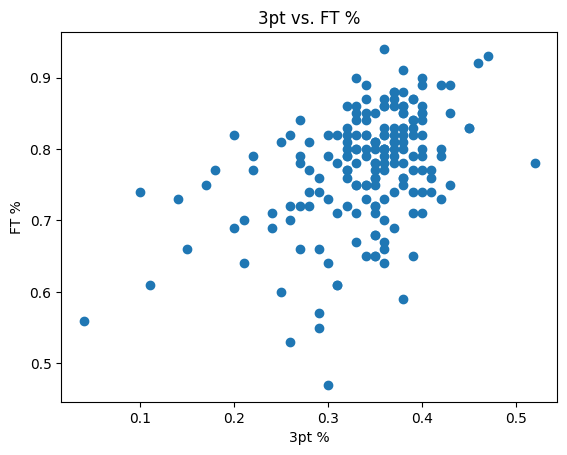

In [46]:
# Make a scatterplot to plot 3pt% against ft%
plt.scatter(filtered_data['3P_PC'], filtered_data['FT_PC'])
plt.xlabel('3pt %')
plt.ylabel('FT %')
plt.title('3pt vs. FT %')
plt.show()

In [47]:
# Using numpy function to calculate correlation coefficient
new_filtered_data = filtered_data[["FT_PC", "3P_PC"]]
new_filtered_data.corr()

,FT_PC,3P_PC
FT_PC,1.000000,0.438154
3P_PC,0.438154,1.000000


#### Function construction

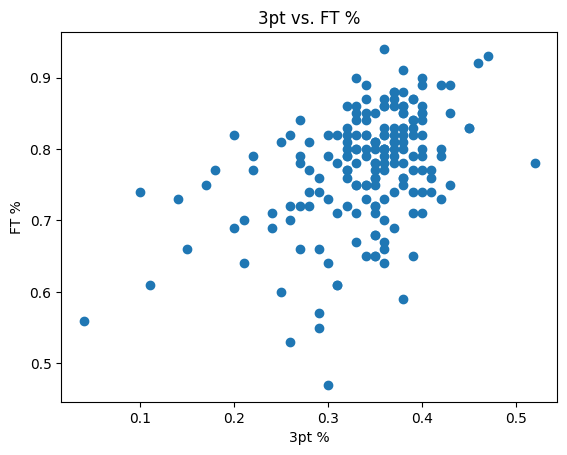

,FT_PC,3P_PC
FT_PC,1.000000,0.438154
3P_PC,0.438154,1.000000


In [48]:
def ft_three_corr(x):
    new_nba_nba = x[["NAME", "FT_PC", "3P_PC"]]
    filtered_data = x[(x['3P_PC'] != 1) & (x['3P_PC'] != 0)]
    filtered_data = filtered_data[["FT_PC", "3P_PC"]]
    plt.scatter(filtered_data['3P_PC'], filtered_data['FT_PC'])
    plt.xlabel('3pt %')
    plt.ylabel('FT %')
    plt.title('3pt vs. FT %')
    plt.show()
    new_filtered_data = filtered_data[["FT_PC", "3P_PC"]]
    return(new_filtered_data.corr())

ft_three_corr(nba_data)

#### This shows there is a moderate correlation between ft% and 3pt%

## Question number 4

#### Question: What players make the most and least dollars/minute?

#### Pseudocode:
  - Calculate total minutes played in a season for all players
  - Calculate dollars made per minute for all players
  - Sort the dataframe to show player's who make most $/min
  - Sort the dataframe to show player's who make least $/min

In [49]:
#Create new row to calculate total minutes played on the year
nba_data['total_min'] = nba_data['GP'] * nba_data['MPG']
nba_data.head()

,NAME,TEAM,SALARY(M),GP,MPG,PPG,FG_PC,3P_PC,FT_PC,RPG,APG,STPG,BLKPG,POSITION,total_min
0,Ramon Sessions,Charlotte Bobcats,5.0,83,26.7,12.3,0.43,0.28,0.81,2.4,4.1,0.6,0.1,PG,2216.1
1,Ben McLemore,Sacramento Kings,2.9,82,26.7,8.8,0.38,0.32,0.80,2.9,1.0,0.6,0.2,SG,2189.4
2,Brandon Bass,Boston Celtics,6.5,82,27.6,11.1,0.49,0.33,0.86,5.7,1.1,0.4,0.9,PF,2263.2
3,Channing Frye,Phoenix Suns,6.4,82,28.2,11.1,0.43,0.37,0.82,5.1,1.2,0.7,0.8,PF,2312.4
4,Cody Zeller,Charlotte Bobcats,3.9,82,17.3,6.0,0.43,0.00,0.73,4.3,1.1,0.5,0.5,PF,1418.6


In [50]:
# Add a new column to calculate points per minute
nba_data['dpm'] = (nba_data['SALARY(M)']/ nba_data['total_min']) * 1000000
nba_data.head()

,NAME,TEAM,SALARY(M),GP,MPG,PPG,FG_PC,3P_PC,FT_PC,RPG,APG,STPG,BLKPG,POSITION,total_min,dpm
0,Ramon Sessions,Charlotte Bobcats,5.0,83,26.7,12.3,0.43,0.28,0.81,2.4,4.1,0.6,0.1,PG,2216.1,2256.215875
1,Ben McLemore,Sacramento Kings,2.9,82,26.7,8.8,0.38,0.32,0.80,2.9,1.0,0.6,0.2,SG,2189.4,1324.563807
2,Brandon Bass,Boston Celtics,6.5,82,27.6,11.1,0.49,0.33,0.86,5.7,1.1,0.4,0.9,PF,2263.2,2872.039590
3,Channing Frye,Phoenix Suns,6.4,82,28.2,11.1,0.43,0.37,0.82,5.1,1.2,0.7,0.8,PF,2312.4,2767.687251
4,Cody Zeller,Charlotte Bobcats,3.9,82,17.3,6.0,0.43,0.00,0.73,4.3,1.1,0.5,0.5,PF,1418.6,2749.189342


In [51]:
# Sort the dataframe by ppm to show who makes the most ppm
nba_data_srtd = nba_data.sort_values(by = 'dpm', ascending = False)
nba_data_srtd.head()


,NAME,TEAM,SALARY(M),GP,MPG,PPG,FG_PC,3P_PC,FT_PC,RPG,APG,STPG,BLKPG,POSITION,total_min,dpm
186,Amar'e Stoudemire,New York Knicks,21.7,65,22.6,11.9,0.56,0.00,0.74,4.9,0.5,0.4,0.6,C,1469.0,14771.953710
220,Pau Gasol,Los Angeles Lakers,19.3,60,31.4,17.4,0.48,0.29,0.74,9.7,3.4,0.5,1.5,PF,1884.0,10244.161359
191,Deron Williams,Brooklyn Nets,18.5,64,32.2,14.3,0.45,0.37,0.80,2.6,6.1,1.5,0.2,PG,2060.8,8977.096273
169,Kris Humphries,Boston Celtics,12.0,69,19.9,8.4,0.50,0.00,0.81,5.9,1.0,0.5,0.9,PF,1373.1,8739.348919
51,Dirk Nowitzki,Dallas Mavericks,22.7,80,32.9,21.7,0.50,0.40,0.90,6.2,2.7,0.9,0.6,PF,2632.0,8624.620061


In [52]:
# Sort data frame to see who makes the least per minute
nba_data_srtd2 = nba_data.sort_values(by = 'dpm', ascending = True)
nba_data_srtd2.head()

,NAME,TEAM,SALARY(M),GP,MPG,PPG,FG_PC,3P_PC,FT_PC,RPG,APG,STPG,BLKPG,POSITION,total_min,dpm
222,Cartier Martin,Chicago Bulls,0.1,59,14.7,5.6,0.42,0.39,0.74,1.9,0.6,0.5,0.1,PF,867.3,115.300357
95,Hollis Thompson,Philadelphia 76ers,0.5,77,22.6,6.0,0.46,0.40,0.71,3.2,0.9,0.7,0.2,SG,1740.2,287.323296
114,Chandler Parsons,Houston Rockets,0.9,74,37.6,16.6,0.47,0.37,0.74,5.5,4.0,1.2,0.4,SF,2782.4,323.461760
147,D.J. Augustin,Toronto Raptors,0.7,71,27.3,13.1,0.42,0.40,0.89,1.8,4.4,0.8,0.0,PG,1938.3,361.141206
86,Lance Stephenson,Indiana Pacers,1.0,78,35.3,13.8,0.49,0.35,0.71,7.2,4.6,0.7,0.1,SG,2753.4,363.187332


In [53]:
def dpm_sorted(x):
    x['total_min'] = x['GP'] * x['MPG']
    x['dpm'] = (x['SALARY(M)']/ x['total_min']) * 1000000
    x_srtd = x.sort_values(by = 'dpm', ascending = False)
    x_srtd2 = x.sort_values(by = 'dpm', ascending = True)
    return x_srtd.head(), x_srtd2.head()


dpm_sorted(nba_data)


(                  NAME                TEAM  SALARY(M)  GP   MPG   PPG  FG_PC  \
 186  Amar'e Stoudemire     New York Knicks       21.7  65  22.6  11.9   0.56   
 220          Pau Gasol  Los Angeles Lakers       19.3  60  31.4  17.4   0.48   
 191     Deron Williams       Brooklyn Nets       18.5  64  32.2  14.3   0.45   
 169     Kris Humphries      Boston Celtics       12.0  69  19.9   8.4   0.50   
 51       Dirk Nowitzki    Dallas Mavericks       22.7  80  32.9  21.7   0.50   
 
      3P_PC  FT_PC  RPG  APG  STPG  BLKPG POSITION  total_min           dpm  
 186   0.00   0.74  4.9  0.5   0.4    0.6        C     1469.0  14771.953710  
 220   0.29   0.74  9.7  3.4   0.5    1.5       PF     1884.0  10244.161359  
 191   0.37   0.80  2.6  6.1   1.5    0.2       PG     2060.8   8977.096273  
 169   0.00   0.81  5.9  1.0   0.5    0.9       PF     1373.1   8739.348919  
 51    0.40   0.90  6.2  2.7   0.9    0.6       PF     2632.0   8624.620061  ,
                  NAME                TEAM 

#### This output shows us that Amar'e Stoudemire made the most dollars per minute(14771) while Cartier Martin made the least dollars per minute(115)